<a href="https://colab.research.google.com/github/ValentineAlibert/Data-physics/blob/master/Week3_finalversion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment for Week 3
# PRA3024: Analysis of Big Data in Physics

In [1]:
from sympy import symbols, diff, Symbol
import scipy.integrate as integrate
import numpy as np
import math
          
#general comments

#M_1 = mass of first object (black hole)           
#M_2 = mass of second object (balck hole)
#M = M_1 + M_2 (total mass)
m1 = 10**30 # kg
m2 = 10**30 # kg

# f = frequency      
# t_c= time of collision    
#phi_c = phase 


c=3*10**8
G=6.67430*10**(-11)   
SNR=10
fs=20 #lower bond
M=10**(31)
#fu=((6**(3/2)*np.pi*M))**(-1)*(c**3)*(1/G)
#Virgo
fu_virgo=500 #higher bond
f=Symbol('f')
S0_virgo=3.24*10**(-46)
def S_virgo(f):
  return S0_virgo*((6.23*f)**(-5)+2*f**(-1)+1+f**(2))

#ture for f>fs
A =np.sqrt(SNR/(4* (integrate.quad(lambda f: (f**(-7/6)/(S0_virgo*((4.49*f)**-56 + (0.16*f)**-4.52 + 0.52 + 0.32*f*f))),fs,fu_virgo)[0])))
print (A)

#for the initial ligo noise curve
def S_ligo(f):
  return S0_ligo*((4.49*f)**(-56)+(0.16*f)**-4.52 + 0.52 + 0.32*f*f)
fu_ligo = 150 
fs_ligo = 40
S0_ligo = 9*10**(-46)

6.092935262837662e-22


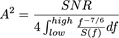

In [0]:
pi =math.pi 

m2 ,m1,T_C,phy_C= symbols ('m2, m1, T_c,phy_c')

M = m2 +m1

def Psi(f):
 return 2*f*T_c - phy_C - (pi/4 ) + (3/(128*(m1.m2/m**(2))*((pi*M*f)**(3/5))))


 
def h(f,psi): 
 return A*f**(-7/6)*exp(1j*psi)

In [3]:
Parametre = [m1,m2,T_C,phy_C]
derivative_hf = diff(h, Parametre[i])/10

def tau(h,f,p1,p2):
  return 4* (integrate.quad(lambda f:diff(h(f, psi),Parametre[p1]*diff(h(f, psi), Parametre[p2]/S_virgo(f),fs,fu_virgo)[0]))
Fisher_M = (Parametre, list (reversed(Parametre)))

#we tried this way but the tau is hard to define

SyntaxError: ignored

I tried to incorporate the code of Hollyqui into my code as you mentionned in class, But i am not sure to understand every step.

I included the two code sells below for the matrix, which I understand and the part which is to import the Einstein and ligo data, but the file wouldn't upload on my colab for a reason that i don't know.

In [0]:
#load Einstein Telescope data

def load_einstein():
    try:
        file = open('EinsteinPDS')
    except:
        print
    string_read = file.read()
    arr = list(map(float, string_read.split()))
    x_arr = []
    y_arr1 = []
    y_arr2 = []
    y_arr3 = []
    for i in range(len(arr)):
        if i % 4 == 0:
            x_arr.append(arr[i])
        if i % 4 == 1:
            y_arr1.append(arr[i])
        if i % 4 == 2:
            y_arr2.append(arr[i])
        if i % 4 == 3:
            y_arr3.append(arr[i])
    plt.plot(x_arr, y_arr1)
    plt.plot(x_arr, y_arr2)
    plt.plot(x_arr, y_arr3)
    plt.yscale('log')
    plt.xscale('log')
    return x_arr, y_arr3

#load Advanced Ligo data

def load_adv_ligo():
    try:
        file = open('LigoPDS')
    except:
        print
    string_read = file.read()
    arr = list(map(float, string_read.split()))
    x_arr = []
    y_arr1 = []
    y_arr2 = []
    y_arr3 = []
    y_arr4 = []
    y_arr5 = []
    y_arr6 = []
    for i in range(len(arr)):
        if i % 7 == 0:
            x_arr.append(arr[i])
        if i % 7 == 1:
            y_arr1.append(arr[i])
        if i % 7 == 2:
            y_arr2.append(arr[i])
        if i % 7 == 3:
            y_arr3.append(arr[i])
        if i % 7 == 4:
            y_arr4.append(arr[i])
        if i % 7 == 5:
            y_arr5.append(arr[i])
        if i % 7 == 6:
            y_arr6.append(arr[i])
    plt.plot(x_arr, y_arr1)
    plt.plot(x_arr, y_arr2)
    plt.plot(x_arr, y_arr3)
    plt.plot(x_arr, y_arr4)
    plt.plot(x_arr, y_arr5)
    plt.plot(x_arr, y_arr6)
    plt.yscale('log')
    plt.xscale('log')
    return x_arr, y_arr6


In [0]:

#Creates matrix using previous function
def create_fisher_matrix(A, freq_list, pds, Psi):
    fisher_matrix = []
    for i in range(len(params)):
        fisher_matrix.append([])
        for j in range(len(params)):
            integral = 0
            for f, sh in zip(freq_list, pds):
                integral += np.real(get_h_f_derivative(A, f, i, function_index)
                                    * get_h_f_derivative(A, f, j, function_index) / sh)
            # print(integral)
            fisher_matrix[-1].append(integral)
    return(fisher_matrix)


def graph_s_h(telescope):
    graph_array = []
    try:
        if telescope == 'ligo':
            for i in range(0, 1000):
                graph_array.append(np.sqrt(s_h_ligo(i)))
        elif telescope == 'adv_ligo':
            for i in range(0, 1000):
                graph_array.append(np.sqrt(s_h_adv_ligo(i)))
        plt.figure()
        plt.plot(graph_array)
        plt.yscale('log')
        plt.xscale('log')
        axes = plt.gca()
        axes.set_ylim([10**(-24), 10**(-21)])
        axes.set_xlim([10**1, 10**3])
    except:
        print()

In [0]:
#green = physics
#  grey = programming

# first, read in the pds of advanced ligo/the Einstein telescope
freq_list, pds = load_adv_ligo()
freq_list_einstein, pds_einstein = load_einstein()

